<a href="https://colab.research.google.com/github/MensureSahin/Hello-World/blob/master/Predicting%20Potential%20Customers-Lead%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
learn = pd.read_csv("ExtraaLearn.csv")

In [ ]:
# Copying data to another variable to avoid any changes to the original data
data = learn.copy()

In [ ]:
data.head(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
data.shape

(4612, 15)

* The dataset has **4612 rows and 15 columns.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

* `age`, `website_visits`, `time_spent_on_website`, `page_views_per_visit`, and `status` are of numeric type while rest of the columns are of object type.

* There are **no null values** in the dataset.

In [ ]:
# Checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

## **EDA**

### **Univariate Analysis**

In [ ]:
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


**Observations:__**

*   Average lead age is 46 with a wide range between 18 and 63. When I look at the percentiles, I see that only 25% of this group is under the age of 36, and 75% is over 36. It seems like most of the leads are older professionals or maybe unemployed.
*   The average number that a lead visits this website is 3.5 with a high range from 0 to 30 and the total time spent on the website is 12 minutes (724 seconds) on average.
*   Average number of pages on the website viewed during the visits is 3.
*   Status is 30% on average, which means that just 30 % of the leads were converted to a paid customer. Company would like to increase this ratio.






In [ ]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize = True))
    print("-" * 50)

EXT001     0.000217
EXT2884    0.000217
EXT3080    0.000217
EXT3079    0.000217
EXT3078    0.000217
             ...   
EXT1537    0.000217
EXT1536    0.000217
EXT1535    0.000217
EXT1534    0.000217
EXT4612    0.000217
Name: ID, Length: 4612, dtype: float64
--------------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: 

**Observations:**
* Most of the leads are working professionals.
* As expected, the majority of the leads interacted with ExtraaLearn from the website.
* Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48.6%, respectively. Only **2.3%** of the profile completions are categorized as low.
* Approx 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that the majority of the leads prefer to communicate via email.
* We can observe that each ID has an equal percentage of values. Let's check the number of unique values in the ID column.

In [ ]:
# Checking the number of unique values
data["ID"].nunique()

4612

* All the values in the ID column are unique.
* We can drop this column as it would not add value to our analysis.

In [ ]:
# Dropping ID column
data.drop(["ID"], axis = 1, inplace = True)

cat_col.remove("ID")

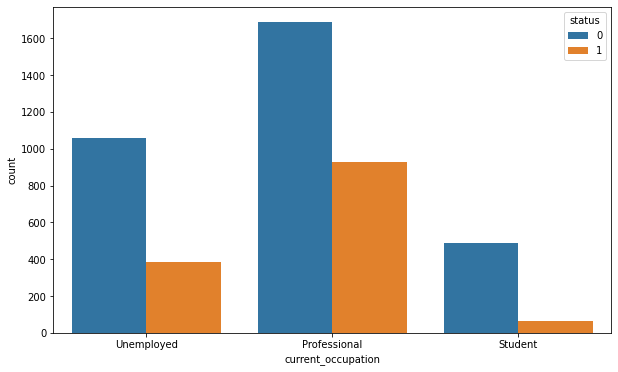

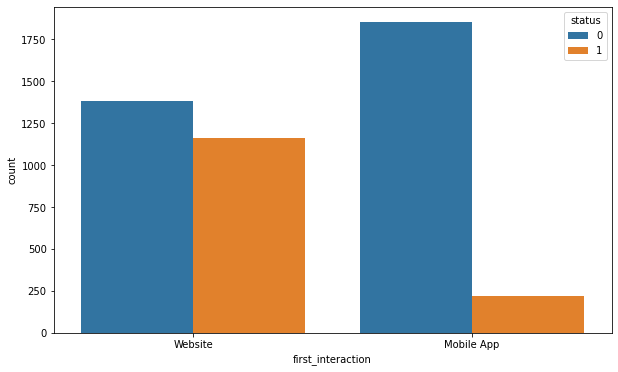

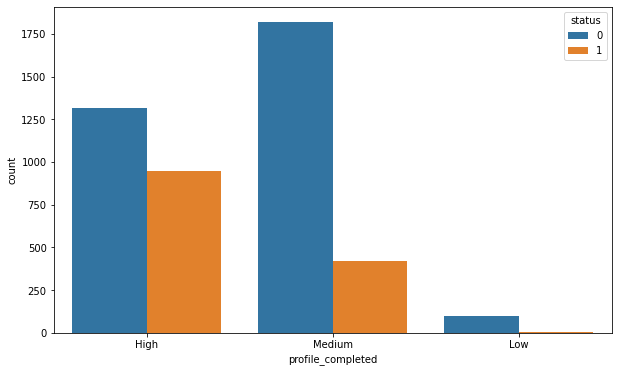

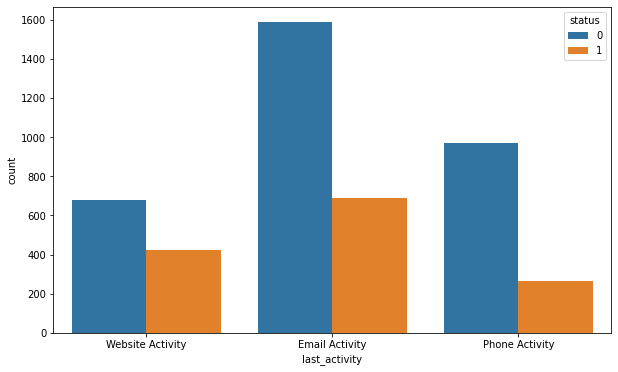

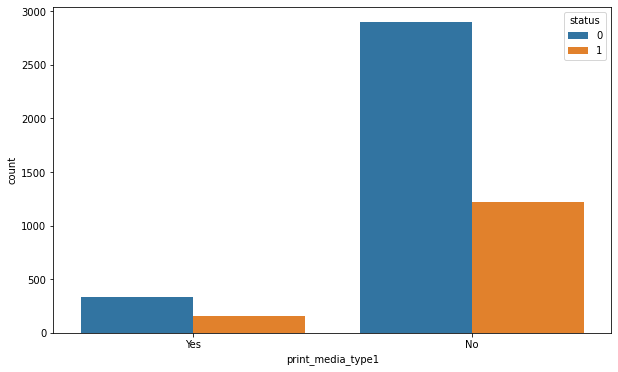

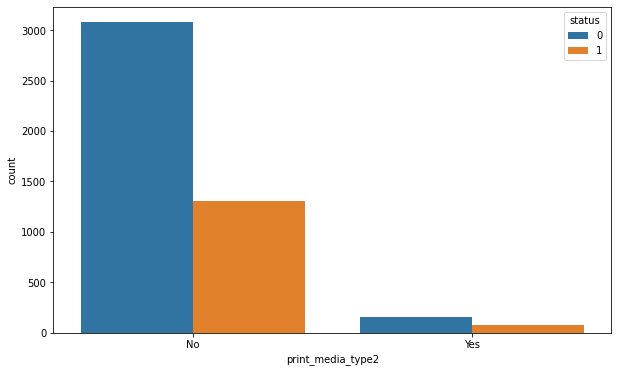

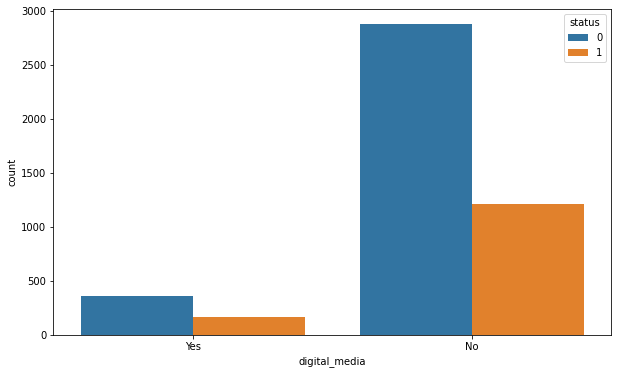

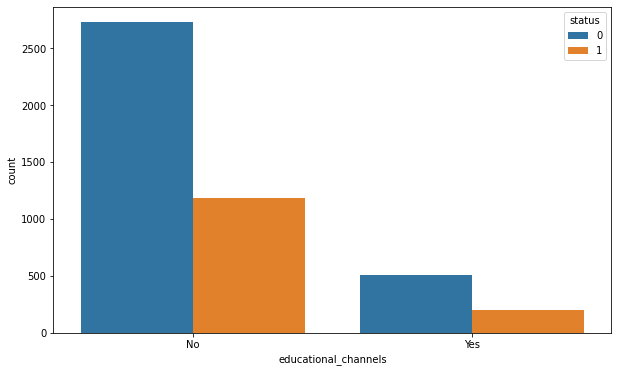

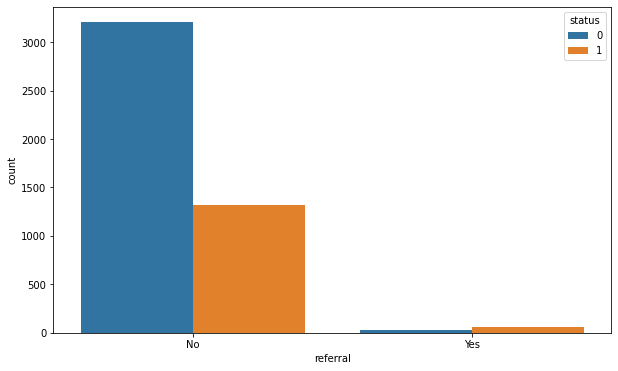

In [ ]:
# Here I want to see bivariate histograms of the categorical columns vs status.
for column in cat_col:
    plt.figure(figsize = (10, 6))
    sns.countplot(x = column, hue = 'status', data = data)
    plt.show()

*   Almost 1/3 of the unemployed leads converted to a paid customer.
*   More than half of the working professional leads (which is nearly double of converted unemployed leads) are now a paid customer. Most of the attention comes from this group.
*   The website does a good job. Almost half of the leads who visit the website are now customers. Other social media platforms, newspapers, magazines, etc., on the other hand, don't seem to be very effective in reaching potential customers. However, the mobile app has good potential and definitely needs to be further developed as it has been downloaded by a large number of people, but only a small fraction of them have converted.
*  Most potential clients are working professionals and it's reasonable that they would prefer to communicate via email rather than live chats on the website or get information over the phone.



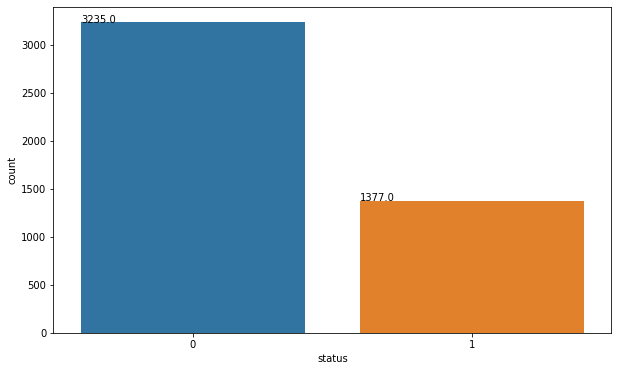

In [ ]:
plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'status', data = data)

# Annotating the exact count on the top of the bar for each category
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+ 0.35))

- The above plot shows that number of leads converted are significantly less than number of leads not converted which can be expected.
- The plot indicates that **~30%** (1377/4612) of leads have been converted.

**Let's check the distribution and outliers for numerical columns in the data**

age
Skew : -0.72


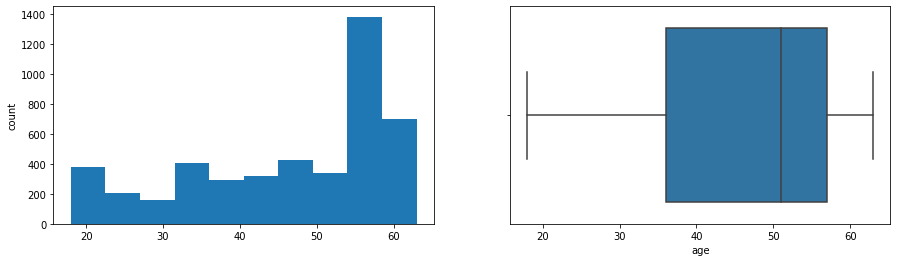

website_visits
Skew : 2.16


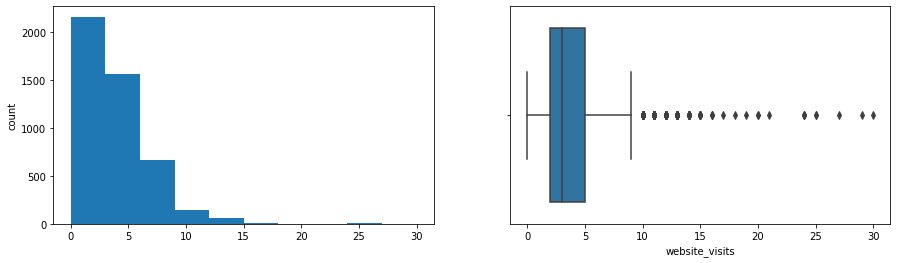

time_spent_on_website
Skew : 0.95


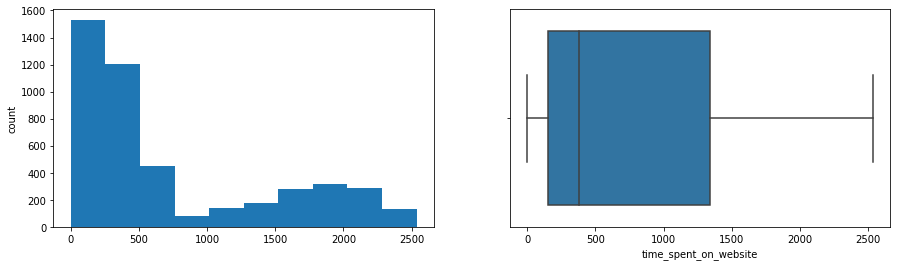

page_views_per_visit
Skew : 1.27


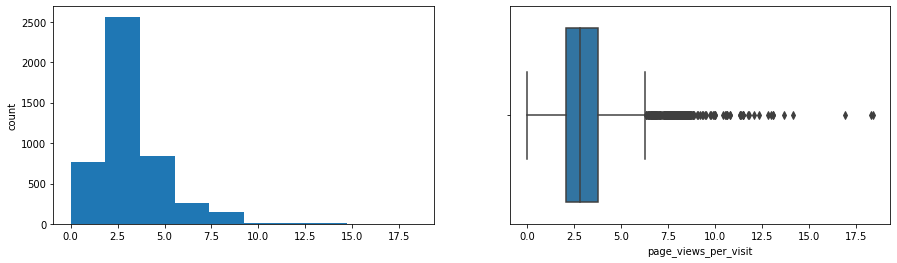

In [ ]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)

    print('Skew :',round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

**Observations:**

*   Age histogram is highly left skewed and confirming our claims that most of the leads are mid-age & older professionals and/or unemployed people. Box plot shows that median age is around 51 and the values between Q1 and the median are more spread out than the values between the median and Q3.
*   Website visits histogram is right skewed, indicating that the majority of leads visit this website less than 5 times with a median of 3 and this data has outliers.
*   Time spent on the web site data has a right-skewed distrubution. A big portion of the data is less than 8 minutes (500 seconds), with a median around 6 minutes (376 sec) a mean of 12 minutes.
*   When I look at the histogram of the average number of pages on the website viewed during the visit, I see a peak at 2.5. This distribution is close to a normal distribution with the majority of the data is between 2 and 4 and the box plot confirms this, we also see lots of outliers over 6.5.





### **Bivariate Analysis**

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Leads will have different expectations from the outcome of the course and their current occupation may play a key role for them to take the program. Let's analyze it.

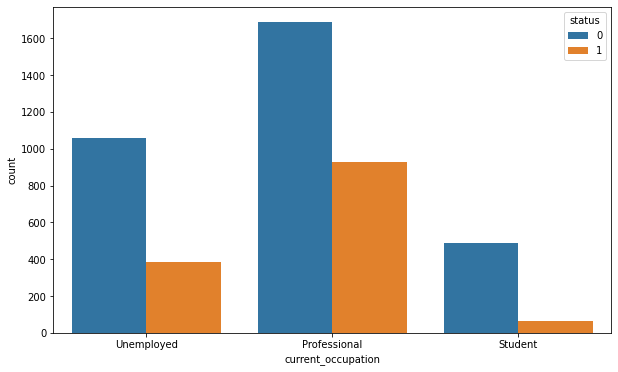

In [ ]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'current_occupation', hue = 'status', data = data)

plt.show()

**Observations:**

- The plot shows that working professional leads are more likely to opt for a course offered by the organization and the students are least likely to be converted.
- This shows that the currently offered programs are more oriented toward working professionals or unemployed personnel. The programs might be suitable for the working professionals who might want to transition to a new role or take up more responsibility in their current role. And also focused on skills that are in high demand making it more suitable for working professionals or currently unemployed leads.

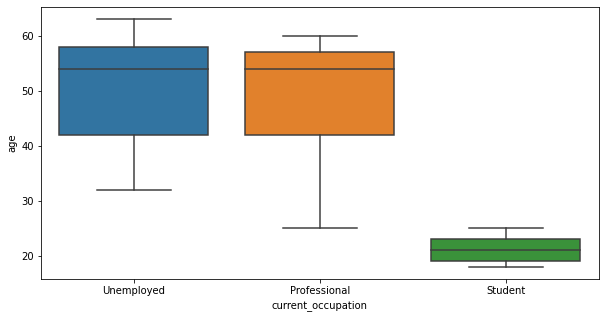

In [ ]:
plt.figure(figsize = (10, 5))

sns.boxplot(y=data["age"], x=data["current_occupation"])

plt.show()

In [ ]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**Observations:**

* The range of age for students is 18 to 25 years.
* The range of age for professionals is 25 to 60 years.
* The range of age for unemployed leads is 32 to 63 years.
* The average age of working professionals and unemployed leads is almost 50 years.

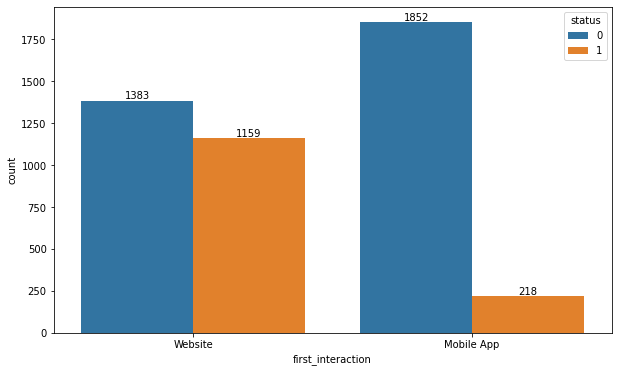

In [ ]:
plt.figure(figsize = (10, 6))

ax= sns.countplot(x = 'first_interaction', hue = 'status', data = data)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

**Observations:**

* The website seems to be doing a good job as compared to mobile app as there is a huge difference in the number of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.
* Majority of the leads who interacted through websites were converted to paid customers, while only a small number of leads, who interacted through mobile app, converted.

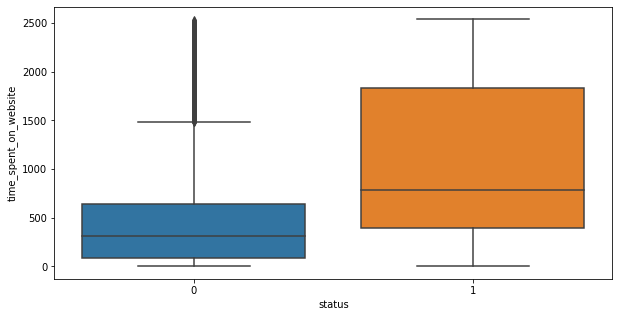

In [ ]:
plt.figure(figsize = (10, 5))

sns.boxplot(y=data["time_spent_on_website"], x=data["status"])

plt.show()

**Observations:**
When I see those box plots, the first thing I capture is the leads who are converted to a paid customer are spending more time on the web site. And, status=1 box plot is wider, which means that values are more spread out compared to the blue box plot. Status=0 box plot is highly right skewed with a median around 6 minutes (~350 seconds) and it has outliers.


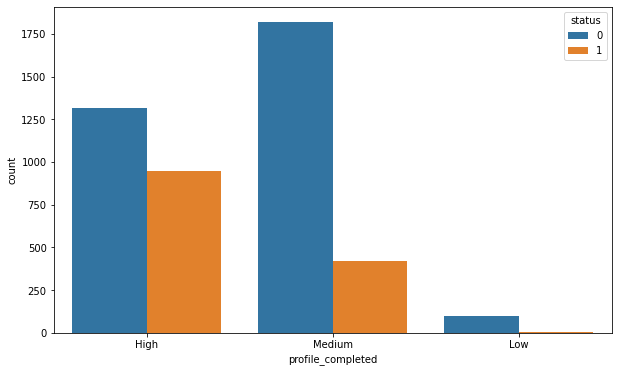

In [ ]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'profile_completed', hue = 'status', data = data)

plt.show()

**Observations:**

* The leads whose profile completion level is high converted more in comparison to other levels of profile completion.
* The medium and low levels of profile completion saw comparatively very less conversions.
* The high level of profile completion might indicate a lead's intent to pursue the course which results in high conversion.

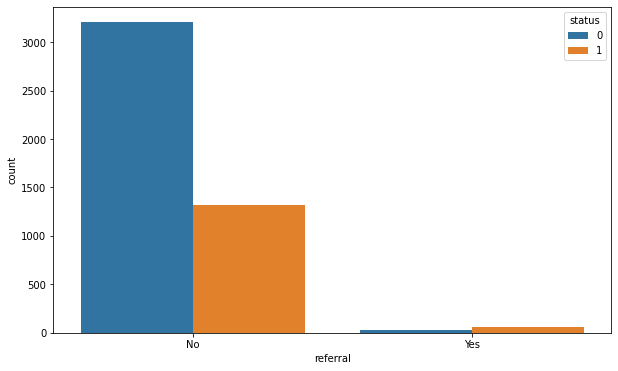

In [ ]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'referral', hue = 'status', data = data)

plt.show()

**Observations:**
* There are a very less number of referrals but the conversion is high.
* Company should try to get more leads through referrals by promoting rewards for existing customer base when they refer someone.

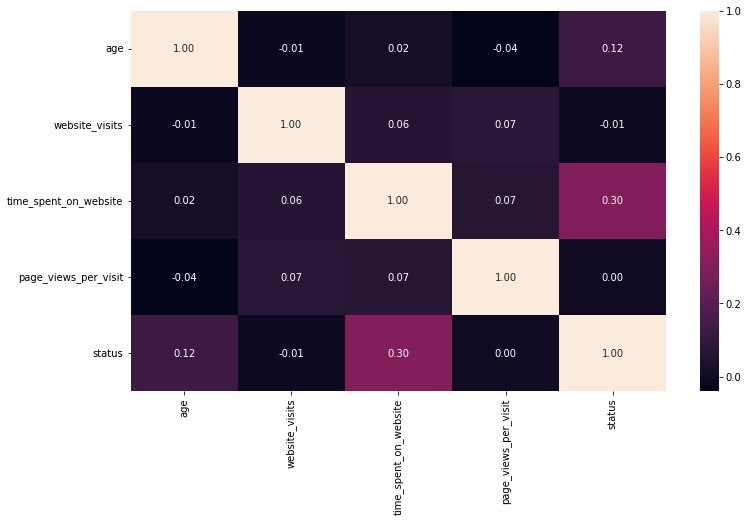

In [ ]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = '.2f')

plt.show()

**Observations:**
There is a positive correlation between the **time spent on website** and **status**, it is not that strong though, just 0.30.
But, we can comfortably say that, more time spent on the website more likely to become a paid customer.

## **Data preparation for modeling**



In [ ]:
# Separating the target variable and other variables
X = data.drop(columns = 'status')

Y = data['status']

In [ ]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

**Checking the shape of the train and test data**

In [ ]:
print("Shape of the training set: ", X_train.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in the test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


## **Building Classification Models**

In [ ]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

### **Decision Tree**

In [ ]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier()

d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

**Let's check the performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



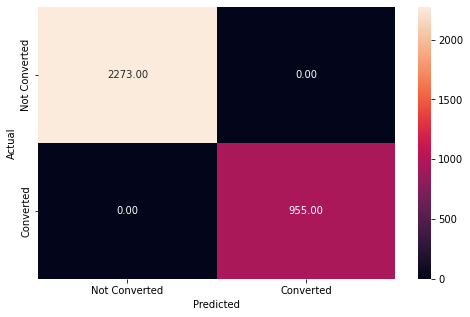

None


In [ ]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

print(metrics_score(y_train, y_pred_train1))

**Observations:**
The Decision tree is giving a 100% score for all metrics on the training dataset. This model overfits the training data.


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       962
           1       0.70      0.69      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



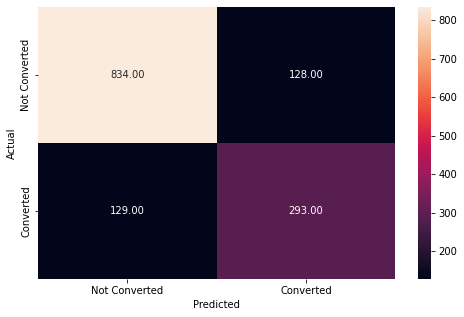

None


In [ ]:
# Checking performance on the testing data

y_pred_test1 = d_tree.predict(X_test)

print(metrics_score(y_test, y_pred_test1))

**Observations:**
The Decision Tree model with default parameters is **overfitting** the training data. The model computes 1 for all metrics, but it does not work so well on the **test data** as the recall is 0.70. The company needs a better recall value. The greater the recall score, higher the chances of minimizing false negatives (losing a potential customer).


<AxesSubplot:xlabel='Importance'>

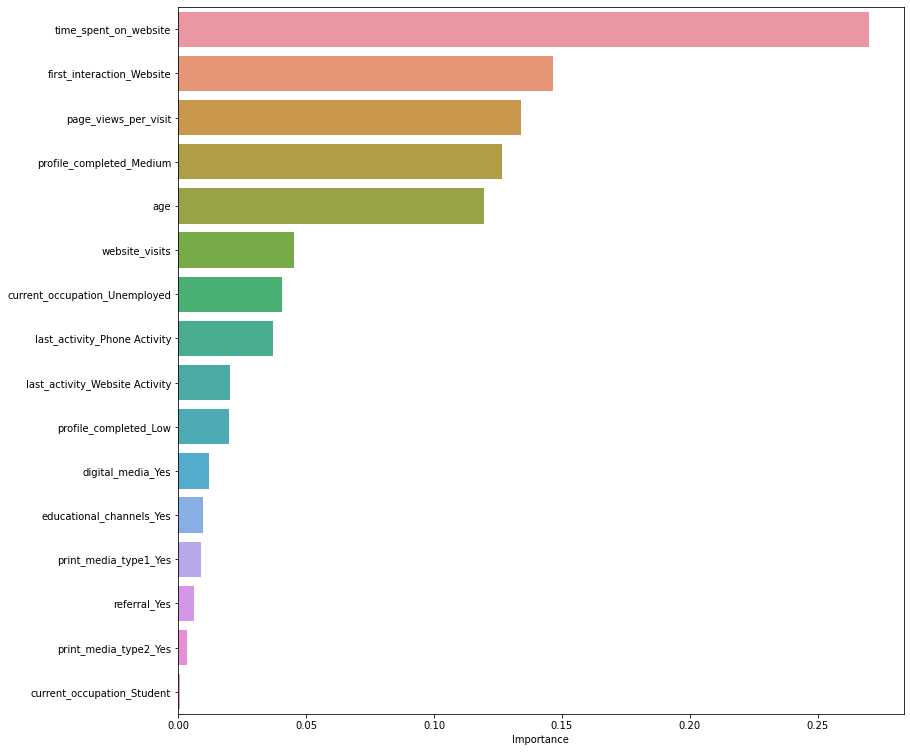

In [ ]:
# Plot the feature importance

importances = d_tree.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

According to the Feature Importance graph obtained with the default parameters; time_spent_on_website is the most important feature, followed by first_interaction_website, page_views_per_visit, profile_completed_medium and age. This model is the most inclusive compared to the tuned decision tree and random forest models. It takes into account most of the characteristics to calculate whether the lead will be a paying customer or not.

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data.

**This would tell the model that 1 is the important class here.**

In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



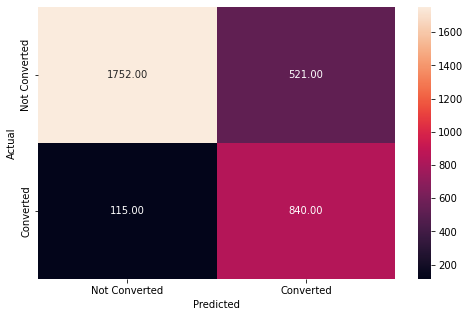

None


In [ ]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

print(metrics_score(y_train, y_pred_train2))

**Observations:**
After hyperparameter tuning we could be able to reduce overfitting on training data and get a recall of 0.88. It is lower than what we get on the previous model (which is 1) and it is fine because we're trying to reduce the overfitting and get better results on the test data.

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



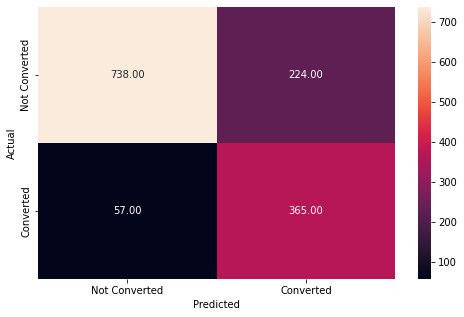

None


In [ ]:
# Checking performance on the testing data

y_pred_test2 = d_tree_tuned.predict(X_test)

print(metrics_score(y_test, y_pred_test2))

**Observations:**
With this tuned model, the performance seems to be better on the test data compared to the model with default values of hyperparameters;
recall increased from 0.70 to 0.86.
This model is not overfitting the training data and giving approximately the same results on the test and train datasets.

**Let's visualize the tuned decision tree** and observe the decision rules:

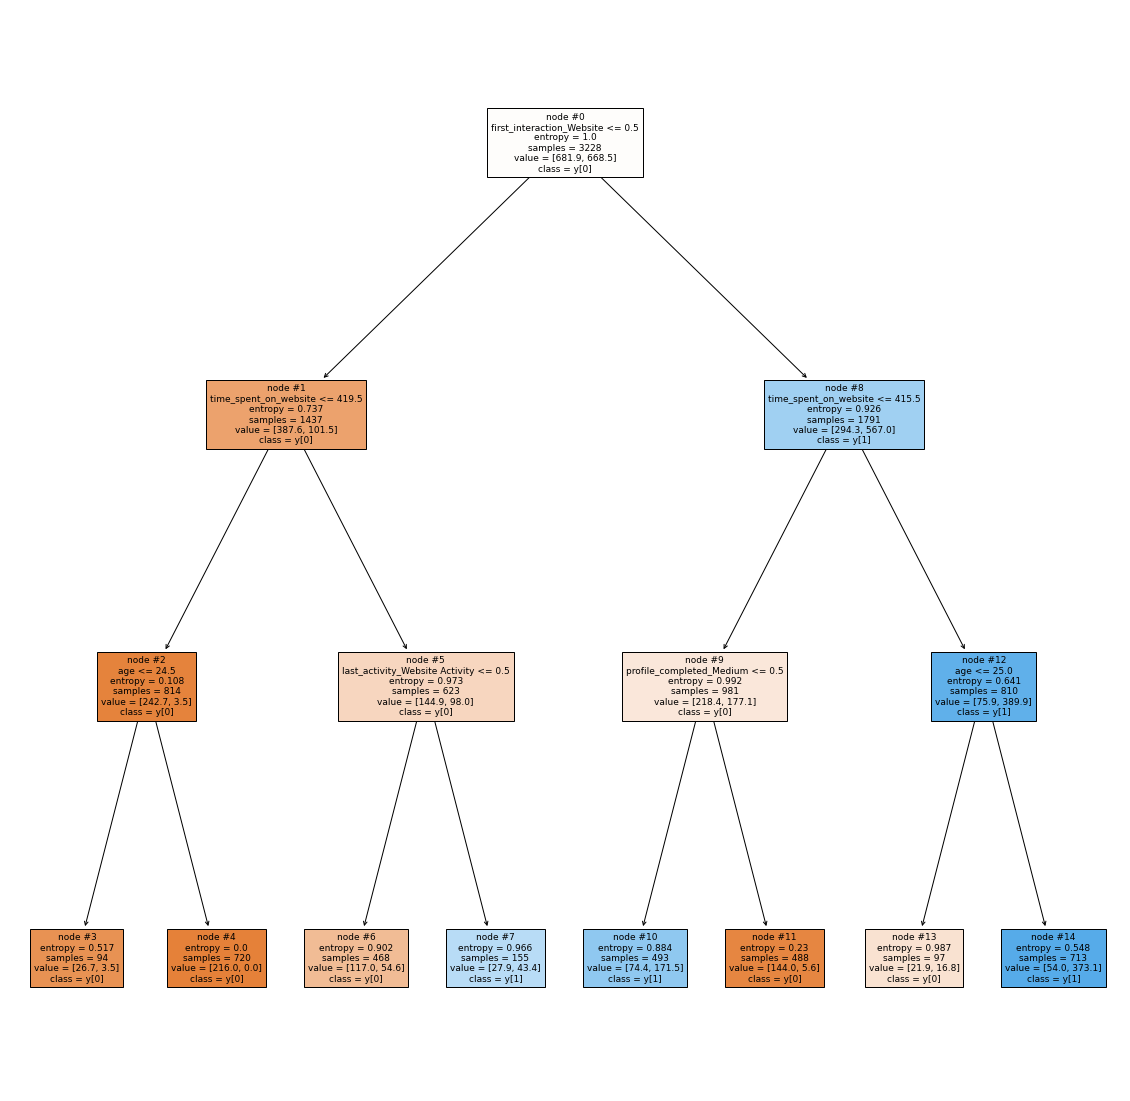

In [ ]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**

*   Leads (no matter what the age is) who first interact with ExtraaLearn through the mobile app and do not spend time more than 7 minutes on the company's website are likely to become a 'not converted' lead.

*   Young leads who first interact through the mobile app and do spend some time on the website and then interacted on live chat with a representative or updated profile on the website, etc. have some potential to become a paid customer. (node 7, 155 samples)

*   On the other hand, older leads(above 25 years of age) who first interact via website and spending time more than 7 minutes on the company's website are likely to become a paying customer.

*  I see that some people visit the website, spend some time (less than 7 minutes), create a profile (but not complete), and half are customers, the other half are not customers. The company can take some actions here; those who take the time to create a profile and change their mind in the meantime are the potential customer of the future. The company needs to track these leads, offer more personalized content or maybe some campaigns to attract them.


**Let's look at the feature importance** of the tuned decision tree model

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
last_activity_Phone Activity    0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


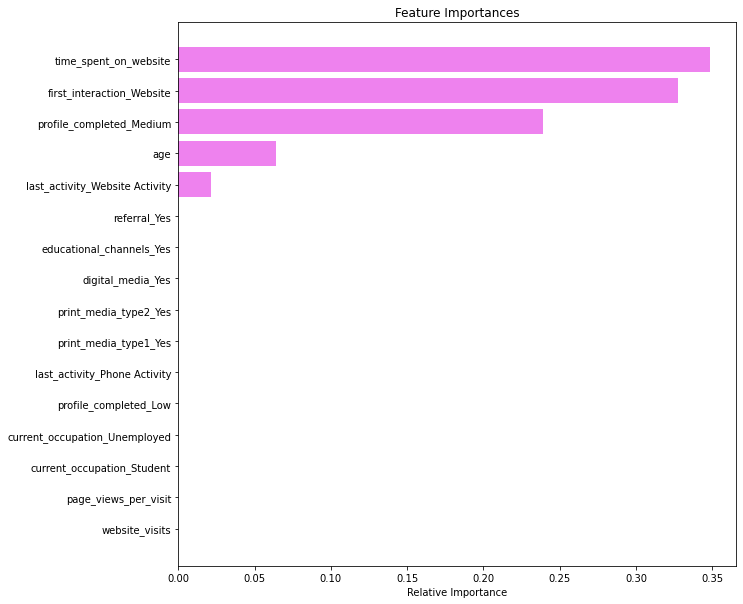

In [ ]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.

Now, let's build another model - **a random forest classifier.**

### **Random Forest Classifier**

In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 7)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



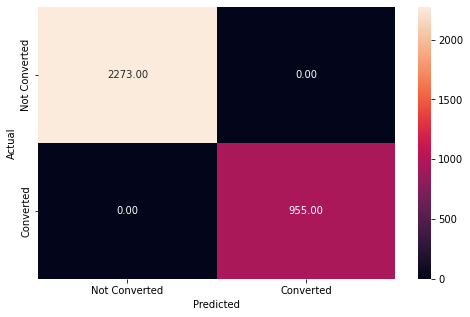

In [ ]:
# Checking performance on the training data

y_pred_train_3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_3)

**Observations:**
The random forest classifier model overfits the training data with all metrics are 1.

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.81      0.68      0.73       422

    accuracy                           0.85      1384
   macro avg       0.84      0.80      0.82      1384
weighted avg       0.85      0.85      0.85      1384



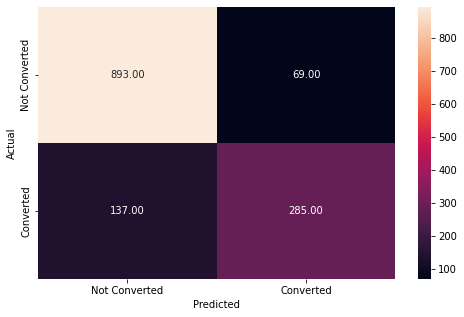

In [ ]:
# Checking performance on the testing data

y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**
We know that the random forest classifier model with default parameters  overfits the training data and the performance for test data is not so well with a recall value of 0.68.

**Let's see if we can get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

In [ ]:

rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.8,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2273
           1       0.80      0.78      0.79       955

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.85      3228
weighted avg       0.88      0.88      0.88      3228



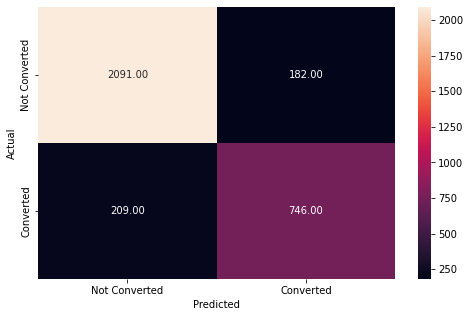

In [ ]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

**Observations:**
- We can see that after hyperparameter tuning, the model is performing poorly on the train data as well.
- We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get better performance.

**Note:** **GridSearchCV can take a long time to run** depending on the number of hyperparameters and the number of values tried for each hyperparameter. **Therefore, we have reduced the number of values passed to each hyperparameter.**

In [ ]:

rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)
# Savig the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_
#Fitting the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

**Let's check the performance of the tuned model**

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



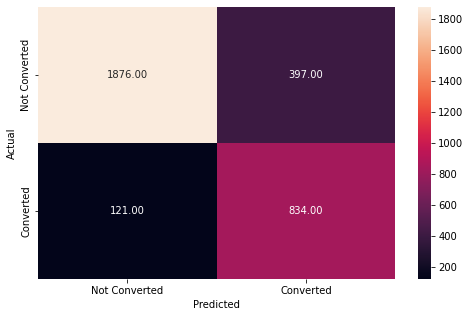

In [ ]:
# Checking performance on the training data

y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Observations:**
The tuned model obtained by using GridSearchCV works better on training data. It gives a recall value of 0.87 which was 0.78 on the previous rf model and there is no overfitting here.

**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



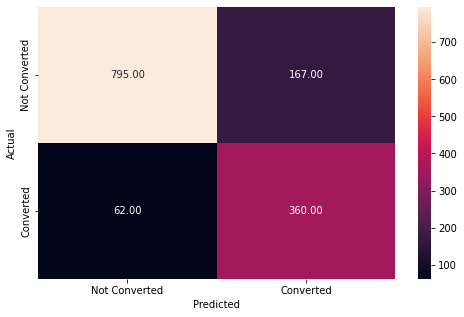

In [ ]:
# Checking performance on the test data

y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observations:**
This model works better on the test data, too! We have a significantly higher recall on the test data (0.85) compared to the one before GridSearchCV tuning (0.68).
When we compare **the tuned decision tree model** (recall 0.86) with this one, we can say that **the tuned rain forest model** almost gives the same recall (0.85) with better acuracy and f1-scores!

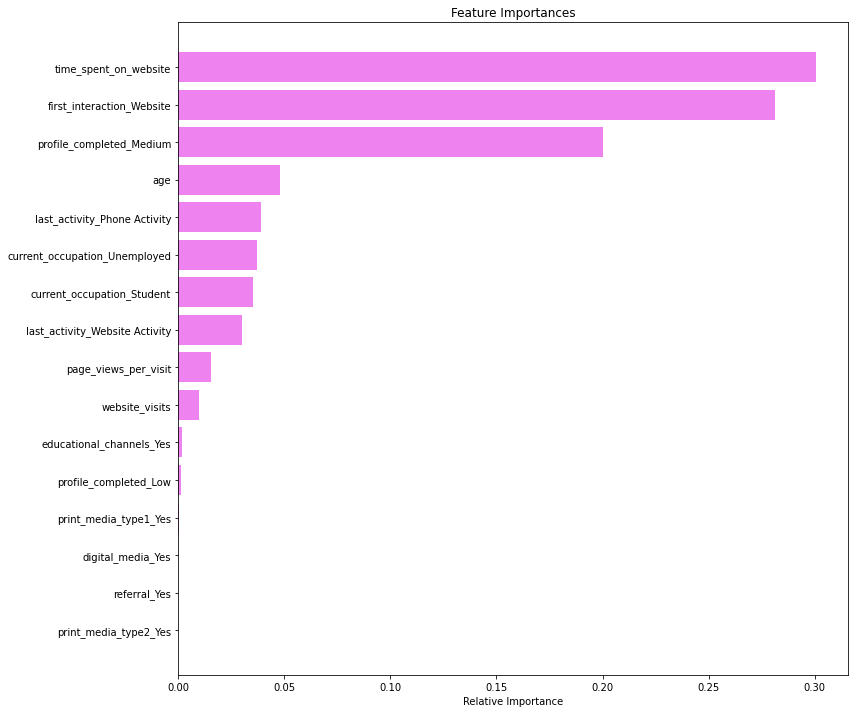

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## **Conclusion and Recommendations**

### **Conclusions:**
The best model we have got so far is the **tuned random forest model** with  **85% recall** for class 1 (converted leads) on the test data which means 85% of positive classifications was identified correctly.
The company can use this model to identify which of the leads are more likely to convert so that they can allocate the resources accordingly.
Total time spent on the website, first interaction channel with ExtraaLearn, what percentage of the profile has been filled by the lead on the website/mobile app and age seem to be the most important factors driving the lead conversion process.

### **Business Recommendations**

*  Only 30% of the total leads could be converted and there is a big potential here. According to the model (tuned rain forest) **Total time spent on the website**, **first interaction channel**, **what percentage of the profile has been filled by the lead** on the website/mobile app and **age** are the most important factors driving the lead conversion process.

*   The website does a good job. Almost half of the leads who visit the website are now customers. However, the mobile app has a great potential and definitely needs to be further developed as it has been downloaded by a large number of people (almost half of the leads first interact via the app), but only a small fraction (1%) of them have been converted. There is an undeniable interest in the app, but somehow people change their minds and decide not to use it. The company should try to find out the reason of this, they may need to improve the mobile app, maybe make it more user-friendly, use better recommendation algorithms to offer personalized learning experience, deliver populer contents, support ApplePay/GooglePay etc.

*   While companies can reach a wider audience, thanks to the availability and ease of use of digital marketing tools; in this particular case, social media, newspapers and magazines don't seem very effective for reaching potential customers.
Since ExtraaLearn is -probably- a limited funding venture (startup), the company may have to cut its advertising budget on these platforms for a while and invest in the development of its mobile app, which has great potential.

*  The company should focus on potential customers who spend some time visiting their website and show a deeper interest like creating a profile and sharing their email addresses to get more information. These are the leads that are most likely to convert.

*  Since most potential customers are active professionals and unemployed, the company should provide more personalized content that meets the needs of these profiles who are looking for a new role or want to take on more responsibility in their current role. The company should be focused to offer contents/courses that are in high demand, making it more suitable for working professionals or currently unemployed leads.


